# Spoken language detection

## 1. 

In [1]:
import os
import random
import numpy as np
import tensorflow as tf
import librosa
import matplotlib.pyplot as plt
import pandas as pd
import IPython

In [2]:
PL_LANG_FILE = os.path.join('languages_audio', 'languages_audio_wav', 'pl', 'clips', 'common_voice_pl_20547814.wav')
PL_LANG_FILE

'languages_audio\\languages_audio_wav\\pl\\clips\\common_voice_pl_20547814.wav'

In [3]:

file_content = tf.io.read_file(PL_LANG_FILE) # Load encoded wav file
type(file_content)
   

tensorflow.python.framework.ops.EagerTensor

In [4]:
wav, sample_rate = tf.audio.decode_wav(file_content, desired_channels=1)

In [5]:
wav

<tf.Tensor: shape=(240768, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)>

In [6]:
sample_rate.numpy() # 48 kHz próbkowanie należy zmienic

48000

In [7]:
wav = tf.squeeze(wav, axis=-1) # axis=-1 żeby usunąć ostatni wymiar który jest równy 1

In [8]:
wav

<tf.Tensor: shape=(240768,), dtype=float32, numpy=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)>

In [9]:
wav = librosa.resample(wav.numpy(), orig_sr=sample_rate.numpy(), target_sr=16_000)

In [10]:
wav = tf.convert_to_tensor(wav, dtype=tf.float32)

In [11]:
wav_example = wav
wav_example

<tf.Tensor: shape=(80256,), dtype=float32, numpy=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)>

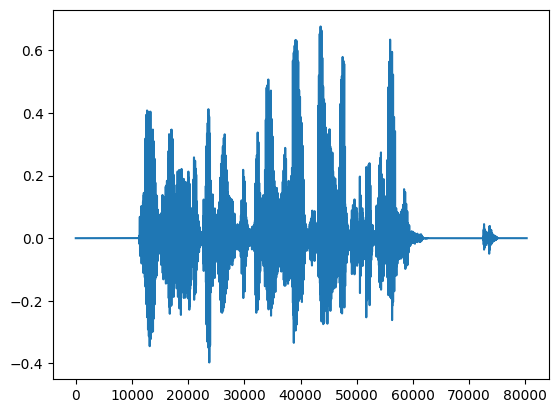

In [12]:
plt.plot(wav)

In [13]:
IPython.display.Audio(PL_LANG_FILE)

### 2. Create Dataset

In [14]:
PL_DIR = os.path.join('languages_audio', 'languages_audio_wav', 'pl', 'clips')
PL_DIR

'languages_audio\\languages_audio_wav\\pl\\clips'

In [15]:
# create tensorflow dataset
pl_dataset = tf.data.Dataset.list_files(PL_DIR + '\*.wav')
pl_dataset

<_ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [16]:
pl_dataset.as_numpy_iterator().next()

b'languages_audio\\languages_audio_wav\\pl\\clips\\common_voice_pl_30547497.wav'

In [17]:
pl_dataset.as_numpy_iterator().next()

b'languages_audio\\languages_audio_wav\\pl\\clips\\common_voice_pl_20750966.wav'

In [18]:
df = pd.read_csv(os.path.join('languages_audio', 'languages_audio_mp3', 'pl', 'validated.tsv'), sep='\t')
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_26440\1487738958.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join('languages_audio', 'languages_audio_mp3', 'pl', 'validated.tsv'), sep='\t')


,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,02eb087ff2dda32b8dd01a85b4693569a62d56033bf17d...,common_voice_pl_24005493.mp3,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,Ostatnie słowa wymówił syczącym szeptem i ze z...,NaN,2,0,NaN,NaN,NaN,NaN,pl,NaN
1,039674fdf440f2c9e53ff991cf27230071a2d969342dfd...,common_voice_pl_20605240.mp3,52f0b3164e79636bfc13b1cebe4c5665bb215bcf26095e...,Gdzież tu powód do wyrzutów?,NaN,5,0,NaN,NaN,NaN,NaN,pl,NaN
2,04bb285ec98789c6485651e8e7c5c5897de0462ce196bc...,common_voice_pl_20605185.mp3,5dd9590867924455c0b3cf4509c805d881a803371b385d...,Lubię go.,NaN,4,1,thirties,male_masculine,NaN,NaN,pl,NaN
3,068bf7cf01fb28afca5df71713cdbf9f52eb54e3d9eba2...,common_voice_pl_20633386.mp3,cc4d58bd50a90820cd2a7fe8ee771e35af924c61a56621...,— To mi nie pomaga.,NaN,3,1,NaN,NaN,NaN,NaN,pl,NaN
4,0935b1713f2c7947adace84ce007d74bf879f358e5c88d...,common_voice_pl_24105374.mp3,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,Ostatnie słowa wymówił syczącym szeptem i ze z...,NaN,2,0,NaN,NaN,NaN,NaN,pl,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131924,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659499.mp3,bf018139e9cb9c21570c757876f2fe4504f6c263d4b68b...,Porwała go i pobiegła do komory.,NaN,2,0,thirties,male_masculine,NaN,NaN,pl,NaN
131925,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659500.mp3,e355f502043dd8de0924144ad636a70466b17c01f7f897...,W drzwiach stał młody krępy górnik o szerokich...,NaN,2,0,thirties,male_masculine,NaN,NaN,pl,NaN
131926,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659501.mp3,3ad3ab45ec4017caf6945d45ef8106d91acbc7c7272a28...,"Naprawdę, nie wiedziałem, czy mam się cieszyć,...",NaN,2,0,thirties,male_masculine,NaN,NaN,pl,NaN
131927,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659502.mp3,0f436de5942a6681274c60800a6996d8fb4f28d4083bf8...,"Ściany były tak grube, że od sąsiedniego pokoj...",NaN,2,0,thirties,male_masculine,NaN,NaN,pl,NaN


In [19]:
df[df['gender'] == 'female_feminine']

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
24,26b6fc36bff0448de0ed25e2b660056ad036f96005bda9...,common_voice_pl_23694146.mp3,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,Ostatnie słowa wymówił syczącym szeptem i ze z...,NaN,2,0,twenties,female_feminine,NaN,NaN,pl,NaN
158,cdd9e3173cd44c3b6695144072c4cf45b7a24a795def30...,common_voice_pl_23579454.mp3,91b75d2edf9c5e09c06eb9191f8f5d3fc97bf0f5a21e37...,Mnie to interesuje.,NaN,2,0,twenties,female_feminine,NaN,NaN,pl,NaN
311,8b6747c24dfbc22ebb50658b742d9e4e6dd59f2d412636...,common_voice_pl_27100225.mp3,0a17d2f0b55ad6227f51534fcc97664417a192e027980a...,Brakuje nam czasu,NaN,2,0,twenties,female_feminine,NaN,NaN,pl,NaN
312,8b6747c24dfbc22ebb50658b742d9e4e6dd59f2d412636...,common_voice_pl_27100226.mp3,0a4f7c81091a523aa2ef361c6bf3f56d45f73cfe16483e...,"Nie ma wątpliwości, że klimat się zmienia",NaN,2,1,twenties,female_feminine,NaN,NaN,pl,NaN
691,c0af0a34f01c2dd7bf4905cae03217ccc228312b8763ea...,common_voice_pl_39597727.mp3,1da9e571e1ab62bb331baf7fea3b07341b281c0782c5d3...,Zmiana wspólnej polityki rolnej,NaN,2,0,seventies,female_feminine,NaN,NaN,pl,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115900,d9c913215277238571f601e0e7963bb1dc371ec6e353b5...,common_voice_pl_26587805.mp3,0958ff79a549e7528519b39cdfca5ae257aa3c90d11be5...,uchylanie się od opodatkowania,NaN,2,0,twenties,female_feminine,NaN,NaN,pl,NaN
115901,d9c913215277238571f601e0e7963bb1dc371ec6e353b5...,common_voice_pl_26587807.mp3,0930c019b37b5ba851c5c0f77d84694a59d8fae415e218...,"Uważam również, że debata ta pokazała, jak wie...",NaN,2,0,twenties,female_feminine,NaN,NaN,pl,NaN
115902,d9c913215277238571f601e0e7963bb1dc371ec6e353b5...,common_voice_pl_26587809.mp3,093caf621077839d205578607762a57b48773fac57ee84...,I popełnia się ją pod obłudną przykrywką rzeko...,NaN,2,0,twenties,female_feminine,NaN,NaN,pl,NaN
115903,d9c913215277238571f601e0e7963bb1dc371ec6e353b5...,common_voice_pl_26587813.mp3,09a6ab44f2bcd21e58ba65e1d9051f75fd6fb24d0cf384...,Wydaje się to technicznie możliwe i zostało ju...,NaN,2,0,twenties,female_feminine,NaN,NaN,pl,NaN


In [20]:
df[df['gender'] == 'male_masculine']

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
2,04bb285ec98789c6485651e8e7c5c5897de0462ce196bc...,common_voice_pl_20605185.mp3,5dd9590867924455c0b3cf4509c805d881a803371b385d...,Lubię go.,NaN,4,1,thirties,male_masculine,NaN,NaN,pl,NaN
22,2486bf621942aa6e36ab658e7791aa38563bf908c2485c...,common_voice_pl_23840821.mp3,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,Ostatnie słowa wymówił syczącym szeptem i ze z...,NaN,2,0,thirties,male_masculine,NaN,NaN,pl,NaN
37,3358c4d8d0cbcdaed3828313b13ad54cb185fa9bbe17a0...,common_voice_pl_24085740.mp3,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,Ostatnie słowa wymówił syczącym szeptem i ze z...,NaN,2,0,twenties,male_masculine,NaN,NaN,pl,NaN
49,46ae7820b8db907ba0951c0db2aca13e4061be363f5b67...,common_voice_pl_23677778.mp3,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,Ostatnie słowa wymówił syczącym szeptem i ze z...,NaN,2,0,twenties,male_masculine,NaN,NaN,pl,NaN
52,4d3b0e719909ca39f14a72a0c2af34145bb10442bd1cbc...,common_voice_pl_20605456.mp3,3369c1ddb7fb5a2ecf2c155634718817a170f3f8e613ef...,"Ona, która go zrozumiała zbyt wąsko: — Ooo, tak.",NaN,7,0,thirties,male_masculine,NaN,NaN,pl,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131924,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659499.mp3,bf018139e9cb9c21570c757876f2fe4504f6c263d4b68b...,Porwała go i pobiegła do komory.,NaN,2,0,thirties,male_masculine,NaN,NaN,pl,NaN
131925,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659500.mp3,e355f502043dd8de0924144ad636a70466b17c01f7f897...,W drzwiach stał młody krępy górnik o szerokich...,NaN,2,0,thirties,male_masculine,NaN,NaN,pl,NaN
131926,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659501.mp3,3ad3ab45ec4017caf6945d45ef8106d91acbc7c7272a28...,"Naprawdę, nie wiedziałem, czy mam się cieszyć,...",NaN,2,0,thirties,male_masculine,NaN,NaN,pl,NaN
131927,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659502.mp3,0f436de5942a6681274c60800a6996d8fb4f28d4083bf8...,"Ściany były tak grube, że od sąsiedniego pokoj...",NaN,2,0,thirties,male_masculine,NaN,NaN,pl,NaN


In [21]:
df.groupby('sentence_id').count()

,client_id,path,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
sentence_id,,,,,,,,,,,,
000010547254f2aa77c475053f8b6b4c83d434f9bc6b39febb275b766c0e4cb7,1,1,1,0,1,1,1,1,1,0,1,0
00007f59e910334724585497c5f56c66445dad9a96bad62108918f507c46d70a,1,1,1,0,1,1,1,1,0,0,1,0
0000a42a2e6b7578771b68c98e11c74b5b086a2ac027592edfeb99e97c6dbf79,1,1,1,0,1,1,1,1,0,0,1,0
00025f331e89b18ae83e113ca0b1809e73ebb3835b9d7bebdd9db4e8f0a35a83,1,1,1,0,1,1,1,1,0,0,1,0
00026e9700c3b59e381a73ca0363782efe5016b2375c5693af2e40f80face7fb,1,1,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
ffecbc28db5bb94420e0417acfd68a3eeaa44c473e0e55ebb626c3ab3df4bb23,3,3,3,0,3,3,3,3,0,0,3,0
ffef45483b2128ee9ddde50f72279d72bd4122b51298735fa6c8ec060356abfd,2,2,2,0,2,2,2,2,0,0,2,0
fff04179750ea84cc1838064e42ab2b595479bec71425ae00e5ea1fd21feb01b,3,3,3,0,3,3,3,3,0,0,3,0


In [22]:
df['sentence_id'].value_counts()

sentence_id
4d7eae22f3184a3b7a662defeceec08aa69b68109ede2e5d699534f545214e98    84
4c97d8f9de17694342d66084c820814bfa5df996855bfffedee0dc03f523a486    84
50ad0cc3186e9995592d55fcd0cd4996cd5952695a1206ccf9ef11069501fe14    84
c52308905f72519ecbbe14b64284126112d1e28732894654f71bc4493fa2ab4b    83
60a5f73c90d77d1fe0f2a660c6bbbadc679ece26a0f464691e319c65c5f5a1ed    83
                                                                    ..
15d001c97690da2440328a6113baaaf55b30ccb3ae9edadf7ef2364c9daf5340     1
1685bd829c38150f7547a850121a61d9aac17d99e838e1dfe251aab05539f3e0     1
166208c753de3c85dc7f9907fd9a4281c70383509cb22d881556ba2933fad062     1
1683b06e44813c337584ce1fadf69629488b57c4990d3d133921ec3d16ab0163     1
710a2e0d24b29da1427629d278732074f4b39b202e52b17ef7299c09b47670e0     1
Name: count, Length: 38536, dtype: int64

In [23]:
df['sentence_id'].nunique()

38536

In [24]:
df['client_id'].value_counts().sort_values(ascending=True)

client_id
02eb087ff2dda32b8dd01a85b4693569a62d56033bf17d7f0565aa45fa29b850e53f808baf94fef3d89be8a5ed0432675594297e47f8e5ea0ddfe86e81a21711        1
068bf7cf01fb28afca5df71713cdbf9f52eb54e3d9eba2bfc971b17cd2aac103a9ef9d74aa63e6471f6562e10320a959623fc0051de88c1cc7662ecffa5b768b        1
0935b1713f2c7947adace84ce007d74bf879f358e5c88df2648d8c0f5176bbc127658efce31ec55938ba30f7359eef9d9eeca55082328732e855e21927e74ff0        1
09e8fc1e934239cfd3124d1ca7f1c4f3d27cde45951bb4a0d8b0014c879f46139067292d9eb3e47b9f210f3207f858add3100b8cdf8df7eaee1b1b6269de0f55        1
0b57062fe0a2d9f1996677fa64a27c01d528f83ab99a419324b4f46584c114374ab44c4df19d8d5c8e9fa7c383cb4d78af384a9ba0bd01af3b4e3d9f0041e303        1
                                                                                                                                    ...  
2c818dfafa7197d291cac63a8b8f41377c82ebf481d2a81244a0329a579d58a91d57d2de0938abb8b4dda68239b41046591191bf1400b012becb05434b37bb36     3484
b1fc1ae975d3f14e8d7a508d

In [25]:
df[['sentence_id', 'client_id']].groupby(by='sentence_id').count().sort_values(by='client_id', ascending=False)


,client_id
sentence_id,
4c97d8f9de17694342d66084c820814bfa5df996855bfffedee0dc03f523a486,84
50ad0cc3186e9995592d55fcd0cd4996cd5952695a1206ccf9ef11069501fe14,84
4d7eae22f3184a3b7a662defeceec08aa69b68109ede2e5d699534f545214e98,84
f2505897bb27ca76f4b45039caf56ccab070b95f0737bd3211845ea1881b0eff,83
60a5f73c90d77d1fe0f2a660c6bbbadc679ece26a0f464691e319c65c5f5a1ed,83
...,...
135d28e4140fed1824b11f9571e100f35c5094f6164fc6cf548ce8b978b90e4b,1
135cfc46346937a25472447586b8aef9e8a40277e1bfece3aa6efe310fb4cdd3,1
135cb6eddb5ccb7a713f55e8f1f5732c1612b49508c066c36c8660bd416beb5b,1


In [26]:
df[['client_id', 'sentence_id']].sort_values(by='client_id', ascending=False)

,client_id,sentence_id
6429,ffffc00a5ed69f08a486837064ec2caeff21fe06264c3d...,c8d122e3a38c2406cfc98e1c92c9b6bfa42360a01ca634...
6431,ffffc00a5ed69f08a486837064ec2caeff21fe06264c3d...,7c049b380c12bde413ab3eb2579079914cb0307db26e8c...
6430,ffffc00a5ed69f08a486837064ec2caeff21fe06264c3d...,b7f580c9ac8f2c2c8e20285a0c16521ab3a979f233277d...
6427,ffffc00a5ed69f08a486837064ec2caeff21fe06264c3d...,ccb6b126fe4d1161924fbc663271fc5fda7308aeee1ceb...
6428,ffffc00a5ed69f08a486837064ec2caeff21fe06264c3d...,c7727ea0625ec2b75629ce52d623e562ff65873c376dc2...
...,...,...
2182,000266163565c94f08a466f947dfae7645d83ee9705ee8...,e7f4a9286200d2cf390df58b3258e982c413ec01dc55e3...
2183,000266163565c94f08a466f947dfae7645d83ee9705ee8...,dfd693f167678a92f8e57fb22361b93d47d2fac99b7f7a...
2184,000266163565c94f08a466f947dfae7645d83ee9705ee8...,edda6b80d957c47119f35d79a2cd2e0b2cdf7ab9e0d332...
2185,000266163565c94f08a466f947dfae7645d83ee9705ee8...,f067783bad53e3b3234e06413876aaf070b4896434efd3...


In [27]:
df[['client_id', 'sentence_id']].sort_values(by='client_id', ascending=False)

,client_id,sentence_id
6429,ffffc00a5ed69f08a486837064ec2caeff21fe06264c3d...,c8d122e3a38c2406cfc98e1c92c9b6bfa42360a01ca634...
6431,ffffc00a5ed69f08a486837064ec2caeff21fe06264c3d...,7c049b380c12bde413ab3eb2579079914cb0307db26e8c...
6430,ffffc00a5ed69f08a486837064ec2caeff21fe06264c3d...,b7f580c9ac8f2c2c8e20285a0c16521ab3a979f233277d...
6427,ffffc00a5ed69f08a486837064ec2caeff21fe06264c3d...,ccb6b126fe4d1161924fbc663271fc5fda7308aeee1ceb...
6428,ffffc00a5ed69f08a486837064ec2caeff21fe06264c3d...,c7727ea0625ec2b75629ce52d623e562ff65873c376dc2...
...,...,...
2182,000266163565c94f08a466f947dfae7645d83ee9705ee8...,e7f4a9286200d2cf390df58b3258e982c413ec01dc55e3...
2183,000266163565c94f08a466f947dfae7645d83ee9705ee8...,dfd693f167678a92f8e57fb22361b93d47d2fac99b7f7a...
2184,000266163565c94f08a466f947dfae7645d83ee9705ee8...,edda6b80d957c47119f35d79a2cd2e0b2cdf7ab9e0d332...
2185,000266163565c94f08a466f947dfae7645d83ee9705ee8...,f067783bad53e3b3234e06413876aaf070b4896434efd3...


In [28]:
df[df['client_id'] == 'ffffc00a5ed69f08a486837064ec2caeff21fe06264c3dd733f633fb6c2ae9aeb561a5a6f43e000554d4b3cc171644ba4ce971177af1cb54f9bd8cc153e71a5c']

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
6427,ffffc00a5ed69f08a486837064ec2caeff21fe06264c3d...,common_voice_pl_20642313.mp3,ccb6b126fe4d1161924fbc663271fc5fda7308aeee1ceb...,"Nie znam takiego, a jednak widziałem go nagieg...",NaN,2,0,NaN,NaN,NaN,NaN,pl,NaN
6428,ffffc00a5ed69f08a486837064ec2caeff21fe06264c3d...,common_voice_pl_20642315.mp3,c7727ea0625ec2b75629ce52d623e562ff65873c376dc2...,"Apollo, chcąc objąć Daphne — objął krzew laurowy.",NaN,3,0,NaN,NaN,NaN,NaN,pl,NaN
6429,ffffc00a5ed69f08a486837064ec2caeff21fe06264c3d...,common_voice_pl_20642317.mp3,c8d122e3a38c2406cfc98e1c92c9b6bfa42360a01ca634...,I mało w tym było pozy.,NaN,2,0,NaN,NaN,NaN,NaN,pl,NaN
6430,ffffc00a5ed69f08a486837064ec2caeff21fe06264c3d...,common_voice_pl_20642319.mp3,b7f580c9ac8f2c2c8e20285a0c16521ab3a979f233277d...,Urządzono w wielu miastach kluby dla dzieci.,NaN,2,0,NaN,NaN,NaN,NaN,pl,NaN
6431,ffffc00a5ed69f08a486837064ec2caeff21fe06264c3d...,common_voice_pl_20642321.mp3,7c049b380c12bde413ab3eb2579079914cb0307db26e8c...,Pewnego razu ona powiedziała do niego: — Twoje...,NaN,2,0,NaN,NaN,NaN,NaN,pl,NaN


In [29]:
# # sprawdzenie czy client_id oraz sequence_id się nie duplikują (czy jeden klient ma rózne sekwencej)
# 
# for client_id in df['client_id'].unique():
#     sentence_count = df['sentence_id'][df['client_id']  == client_id].count()
#     client_id_count = df['client_id'][df['client_id']  == client_id].value_counts().iloc[0]
#     if sentence_count != client_id_count:
#         print(True)


In [30]:
df['sentence_id'][df['client_id']  == 'ffffc00a5ed69f08a486837064ec2caeff21fe06264c3dd733f633fb6c2ae9aeb561a5a6f43e000554d4b3cc171644ba4ce971177af1cb54f9bd8cc153e71a5c'].count()

5

In [31]:
df['client_id'][df['client_id']  == 'ffffc00a5ed69f08a486837064ec2caeff21fe06264c3dd733f633fb6c2ae9aeb561a5a6f43e000554d4b3cc171644ba4ce971177af1cb54f9bd8cc153e71a5c'].value_counts()

client_id
ffffc00a5ed69f08a486837064ec2caeff21fe06264c3dd733f633fb6c2ae9aeb561a5a6f43e000554d4b3cc171644ba4ce971177af1cb54f9bd8cc153e71a5c    5
Name: count, dtype: int64

In [32]:
# TODO: WZiąć plik validated.tsv nastepnie podzielić go na mężczyzn i kobiety (dwa osobne dataset) [DONE]. następnie wrzucać do każdego ze zbiorów (najpiew testwoy, walidacyjny, treningowy) client_id od najmniejszej liczby wystąpień w obydwu  dopasować czas trwania każdej próbki (najpierw obcinać od środka, potem dopełniać zerami), zmienić na spektogram i dopiero wtedy dodać (koniec funkcji). druga funkcja będzie jako augumentowanie losowych danych (losowo wybiera funkcję która coś zrobi z danymi) jeżeli moje zbiory kobiet i mężczyzn nie będą spełniały wymaganej ilości próbek którą się poda. Na wyjściu ma być tensor z próbkami spektogramu. To zrobić finalnie dla każdego folderu (języka). Wtedy dopiero dodać label w formie one hot encoding

## Load data:

In [33]:
df = pd.read_csv(os.path.join('languages_audio', 'languages_audio_mp3', 'pl', 'validated.tsv'), sep='\t', usecols=['client_id', 'path', 'sentence_id', 'gender', 'locale'])

## Change mp3 to wav name

In [34]:
df = df.apply(lambda path: path.str.replace('.mp3', '.wav'))

## Split to woman and man sets

In [35]:
df

,client_id,path,sentence_id,gender,locale
0,02eb087ff2dda32b8dd01a85b4693569a62d56033bf17d...,common_voice_pl_24005493.wav,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,NaN,pl
1,039674fdf440f2c9e53ff991cf27230071a2d969342dfd...,common_voice_pl_20605240.wav,52f0b3164e79636bfc13b1cebe4c5665bb215bcf26095e...,NaN,pl
2,04bb285ec98789c6485651e8e7c5c5897de0462ce196bc...,common_voice_pl_20605185.wav,5dd9590867924455c0b3cf4509c805d881a803371b385d...,male_masculine,pl
3,068bf7cf01fb28afca5df71713cdbf9f52eb54e3d9eba2...,common_voice_pl_20633386.wav,cc4d58bd50a90820cd2a7fe8ee771e35af924c61a56621...,NaN,pl
4,0935b1713f2c7947adace84ce007d74bf879f358e5c88d...,common_voice_pl_24105374.wav,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,NaN,pl
...,...,...,...,...,...
131924,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659499.wav,bf018139e9cb9c21570c757876f2fe4504f6c263d4b68b...,male_masculine,pl
131925,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659500.wav,e355f502043dd8de0924144ad636a70466b17c01f7f897...,male_masculine,pl
131926,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659501.wav,3ad3ab45ec4017caf6945d45ef8106d91acbc7c7272a28...,male_masculine,pl
131927,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659502.wav,0f436de5942a6681274c60800a6996d8fb4f28d4083bf8...,male_masculine,pl


In [36]:
woman_filter = df['gender'] == 'female_feminine'
man_filter = df['gender'] == 'male_masculine'

In [37]:
df_women = df[woman_filter]
df_women

,client_id,path,sentence_id,gender,locale
24,26b6fc36bff0448de0ed25e2b660056ad036f96005bda9...,common_voice_pl_23694146.wav,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,female_feminine,pl
158,cdd9e3173cd44c3b6695144072c4cf45b7a24a795def30...,common_voice_pl_23579454.wav,91b75d2edf9c5e09c06eb9191f8f5d3fc97bf0f5a21e37...,female_feminine,pl
311,8b6747c24dfbc22ebb50658b742d9e4e6dd59f2d412636...,common_voice_pl_27100225.wav,0a17d2f0b55ad6227f51534fcc97664417a192e027980a...,female_feminine,pl
312,8b6747c24dfbc22ebb50658b742d9e4e6dd59f2d412636...,common_voice_pl_27100226.wav,0a4f7c81091a523aa2ef361c6bf3f56d45f73cfe16483e...,female_feminine,pl
691,c0af0a34f01c2dd7bf4905cae03217ccc228312b8763ea...,common_voice_pl_39597727.wav,1da9e571e1ab62bb331baf7fea3b07341b281c0782c5d3...,female_feminine,pl
...,...,...,...,...,...
115900,d9c913215277238571f601e0e7963bb1dc371ec6e353b5...,common_voice_pl_26587805.wav,0958ff79a549e7528519b39cdfca5ae257aa3c90d11be5...,female_feminine,pl
115901,d9c913215277238571f601e0e7963bb1dc371ec6e353b5...,common_voice_pl_26587807.wav,0930c019b37b5ba851c5c0f77d84694a59d8fae415e218...,female_feminine,pl
115902,d9c913215277238571f601e0e7963bb1dc371ec6e353b5...,common_voice_pl_26587809.wav,093caf621077839d205578607762a57b48773fac57ee84...,female_feminine,pl
115903,d9c913215277238571f601e0e7963bb1dc371ec6e353b5...,common_voice_pl_26587813.wav,09a6ab44f2bcd21e58ba65e1d9051f75fd6fb24d0cf384...,female_feminine,pl


In [38]:
df_men = df[man_filter]
df_men

,client_id,path,sentence_id,gender,locale
2,04bb285ec98789c6485651e8e7c5c5897de0462ce196bc...,common_voice_pl_20605185.wav,5dd9590867924455c0b3cf4509c805d881a803371b385d...,male_masculine,pl
22,2486bf621942aa6e36ab658e7791aa38563bf908c2485c...,common_voice_pl_23840821.wav,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,male_masculine,pl
37,3358c4d8d0cbcdaed3828313b13ad54cb185fa9bbe17a0...,common_voice_pl_24085740.wav,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,male_masculine,pl
49,46ae7820b8db907ba0951c0db2aca13e4061be363f5b67...,common_voice_pl_23677778.wav,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,male_masculine,pl
52,4d3b0e719909ca39f14a72a0c2af34145bb10442bd1cbc...,common_voice_pl_20605456.wav,3369c1ddb7fb5a2ecf2c155634718817a170f3f8e613ef...,male_masculine,pl
...,...,...,...,...,...
131924,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659499.wav,bf018139e9cb9c21570c757876f2fe4504f6c263d4b68b...,male_masculine,pl
131925,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659500.wav,e355f502043dd8de0924144ad636a70466b17c01f7f897...,male_masculine,pl
131926,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659501.wav,3ad3ab45ec4017caf6945d45ef8106d91acbc7c7272a28...,male_masculine,pl
131927,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659502.wav,0f436de5942a6681274c60800a6996d8fb4f28d4083bf8...,male_masculine,pl


## Set number of probes in my set and split it to train, validate and test

In [39]:
SET_SIZE = 50_000
MAX_NUMBER_OF_CLIENT_ID = 3000
MIN_CLIP_DURATION = 4000 #  clip time in [ms]

TRAIN_SIZE = int(SET_SIZE * 0.6)
VAL_SIZE = int((SET_SIZE - TRAIN_SIZE) // 2)
TEST_SIZE = SET_SIZE - TRAIN_SIZE - VAL_SIZE

print(f'Train size: {TRAIN_SIZE}')
print(f'Validation size: {VAL_SIZE}')
print(f'Test size: {TEST_SIZE}')
print(f'Sum of sizes: {TRAIN_SIZE + VAL_SIZE + TEST_SIZE} is equal to SET_SIZE {TRAIN_SIZE + VAL_SIZE + TEST_SIZE == SET_SIZE}')

Train size: 30000
Validation size: 10000
Test size: 10000
Sum of sizes: 50000 is equal to SET_SIZE True


In [40]:
# Select probes with min that time 
df_clips_duration = pd.read_csv(os.path.join('languages_audio', 'languages_audio_mp3', 'pl', 'clip_durations.tsv'), sep='\t')
df_clips_duration['clip'] = df_clips_duration['clip'].apply(lambda clip: clip.replace('.mp3', '.wav'))
df_men = df_men.merge(df_clips_duration, left_on='path', right_on='clip')
df_men

,client_id,path,sentence_id,gender,locale,clip,duration[ms]
0,04bb285ec98789c6485651e8e7c5c5897de0462ce196bc...,common_voice_pl_20605185.wav,5dd9590867924455c0b3cf4509c805d881a803371b385d...,male_masculine,pl,common_voice_pl_20605185.wav,7584
1,2486bf621942aa6e36ab658e7791aa38563bf908c2485c...,common_voice_pl_23840821.wav,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,male_masculine,pl,common_voice_pl_23840821.wav,7944
2,3358c4d8d0cbcdaed3828313b13ad54cb185fa9bbe17a0...,common_voice_pl_24085740.wav,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,male_masculine,pl,common_voice_pl_24085740.wav,7488
3,46ae7820b8db907ba0951c0db2aca13e4061be363f5b67...,common_voice_pl_23677778.wav,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,male_masculine,pl,common_voice_pl_23677778.wav,5256
4,4d3b0e719909ca39f14a72a0c2af34145bb10442bd1cbc...,common_voice_pl_20605456.wav,3369c1ddb7fb5a2ecf2c155634718817a170f3f8e613ef...,male_masculine,pl,common_voice_pl_20605456.wav,6456
...,...,...,...,...,...,...,...
79867,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659499.wav,bf018139e9cb9c21570c757876f2fe4504f6c263d4b68b...,male_masculine,pl,common_voice_pl_21659499.wav,3696
79868,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659500.wav,e355f502043dd8de0924144ad636a70466b17c01f7f897...,male_masculine,pl,common_voice_pl_21659500.wav,6696
79869,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659501.wav,3ad3ab45ec4017caf6945d45ef8106d91acbc7c7272a28...,male_masculine,pl,common_voice_pl_21659501.wav,5304
79870,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659502.wav,0f436de5942a6681274c60800a6996d8fb4f28d4083bf8...,male_masculine,pl,common_voice_pl_21659502.wav,6024


In [41]:

# 
# for i in range(len(df_clips_duration)):
#     print(i)
#     row_in_df = df_men[df_men['path']== df_clips_duration.iloc[i]['clip']] 
#     if (df_clips_duration.iloc[i]['duration[ms]'] >= MIN_CLIP_DURATION) and (len(row_in_df) >= 0):
#         rows_over_min_dur_time = pd.concat([rows_over_min_dur_time, row_in_df])
#     else:
#         rows_under_min_dur_time = pd.concat([rows_under_min_dur_time, row_in_df])
# 
# 

rows_over_min_dur_time = df_men[df_men['duration[ms]'] >= MIN_CLIP_DURATION]
rows_under_min_dur_time = df_men[df_men['duration[ms]'] < MIN_CLIP_DURATION]
rows_over_min_dur_time

,client_id,path,sentence_id,gender,locale,clip,duration[ms]
0,04bb285ec98789c6485651e8e7c5c5897de0462ce196bc...,common_voice_pl_20605185.wav,5dd9590867924455c0b3cf4509c805d881a803371b385d...,male_masculine,pl,common_voice_pl_20605185.wav,7584
1,2486bf621942aa6e36ab658e7791aa38563bf908c2485c...,common_voice_pl_23840821.wav,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,male_masculine,pl,common_voice_pl_23840821.wav,7944
2,3358c4d8d0cbcdaed3828313b13ad54cb185fa9bbe17a0...,common_voice_pl_24085740.wav,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,male_masculine,pl,common_voice_pl_24085740.wav,7488
3,46ae7820b8db907ba0951c0db2aca13e4061be363f5b67...,common_voice_pl_23677778.wav,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,male_masculine,pl,common_voice_pl_23677778.wav,5256
4,4d3b0e719909ca39f14a72a0c2af34145bb10442bd1cbc...,common_voice_pl_20605456.wav,3369c1ddb7fb5a2ecf2c155634718817a170f3f8e613ef...,male_masculine,pl,common_voice_pl_20605456.wav,6456
...,...,...,...,...,...,...,...
79865,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659484.wav,a83ee5b0dfc776d8dfb29934fd4b9410fd1fd1d1e780c7...,male_masculine,pl,common_voice_pl_21659484.wav,4656
79868,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659500.wav,e355f502043dd8de0924144ad636a70466b17c01f7f897...,male_masculine,pl,common_voice_pl_21659500.wav,6696
79869,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659501.wav,3ad3ab45ec4017caf6945d45ef8106d91acbc7c7272a28...,male_masculine,pl,common_voice_pl_21659501.wav,5304
79870,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659502.wav,0f436de5942a6681274c60800a6996d8fb4f28d4083bf8...,male_masculine,pl,common_voice_pl_21659502.wav,6024


In [42]:
rows_under_min_dur_time

,client_id,path,sentence_id,gender,locale,clip,duration[ms]
9,9d9a5ec6ddce58dc304abcc92d2ad273c8c2736cf253d6...,common_voice_pl_20605516.wav,3f2606624aca7b8a9d8ec80f586460a095d12ebf5e6f08...,male_masculine,pl,common_voice_pl_20605516.wav,3216
21,3c3970d04fe7c7271d9e6b1426e00beb1b51a977fe4787...,common_voice_pl_20605922.wav,780aaee039d89108aae855d281233b7975615cc3a1eb4a...,male_masculine,pl,common_voice_pl_20605922.wav,3624
25,7faf1b2a8074d32814fd8c78aaaea5abe0aa23ca45f183...,common_voice_pl_22723318.wav,1e30e5a51b1d04b6011b2c76995ab608d0dd0a59611d84...,male_masculine,pl,common_voice_pl_22723318.wav,3048
28,da9b81e6715e1dec2a6ab9b92e35768840b763b290feaf...,common_voice_pl_20613227.wav,63b0704f37221e7cdde32b87a84d68d8005b4d73e22704...,male_masculine,pl,common_voice_pl_20613227.wav,3624
30,e09d32c81be499447e2a638ed932c0bad5c3c89820072c...,common_voice_pl_20703091.wav,893fa0aa1d9c33e69338f61d425a1e6c46a9158f1906f4...,male_masculine,pl,common_voice_pl_20703091.wav,2952
...,...,...,...,...,...,...,...
79861,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659478.wav,b475a12d8bc4a52709050a96f96dbfe27684665088734e...,male_masculine,pl,common_voice_pl_21659478.wav,2304
79863,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659481.wav,d2972df9aa18c9440e1324c88d5c0f7d4e0f3aa571f368...,male_masculine,pl,common_voice_pl_21659481.wav,3024
79864,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659482.wav,e8d211592601ff9cdf7709620533c94a8a12dce393a085...,male_masculine,pl,common_voice_pl_21659482.wav,3024
79866,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659485.wav,c52aba9d343f2d9235404e9e60161ecd4255ef218b21ef...,male_masculine,pl,common_voice_pl_21659485.wav,3936


In [43]:
if len(rows_over_min_dur_time) >= SET_SIZE:
    df_men = rows_over_min_dur_time
else:
    df_men = pd.concat([rows_over_min_dur_time, rows_under_min_dur_time], ignore_index=True)[:SET_SIZE]

df_men

,client_id,path,sentence_id,gender,locale,clip,duration[ms]
0,04bb285ec98789c6485651e8e7c5c5897de0462ce196bc...,common_voice_pl_20605185.wav,5dd9590867924455c0b3cf4509c805d881a803371b385d...,male_masculine,pl,common_voice_pl_20605185.wav,7584
1,2486bf621942aa6e36ab658e7791aa38563bf908c2485c...,common_voice_pl_23840821.wav,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,male_masculine,pl,common_voice_pl_23840821.wav,7944
2,3358c4d8d0cbcdaed3828313b13ad54cb185fa9bbe17a0...,common_voice_pl_24085740.wav,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,male_masculine,pl,common_voice_pl_24085740.wav,7488
3,46ae7820b8db907ba0951c0db2aca13e4061be363f5b67...,common_voice_pl_23677778.wav,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,male_masculine,pl,common_voice_pl_23677778.wav,5256
4,4d3b0e719909ca39f14a72a0c2af34145bb10442bd1cbc...,common_voice_pl_20605456.wav,3369c1ddb7fb5a2ecf2c155634718817a170f3f8e613ef...,male_masculine,pl,common_voice_pl_20605456.wav,6456
...,...,...,...,...,...,...,...
49995,40bd5e8a398f25acaf9a7895fb354e47dc92af1e0b9a23...,common_voice_pl_20617123.wav,f896b244c3ba835adbc4cd8d61c971a7238c717d8c1967...,male_masculine,pl,common_voice_pl_20617123.wav,3168
49996,40bd5e8a398f25acaf9a7895fb354e47dc92af1e0b9a23...,common_voice_pl_20617124.wav,048d9c00ed251b544caa57bf5310dfe8ba02d287c3506d...,male_masculine,pl,common_voice_pl_20617124.wav,3624
49997,40bd5e8a398f25acaf9a7895fb354e47dc92af1e0b9a23...,common_voice_pl_20617183.wav,06a0a73cd90b0ca0b0e045d5066639fd6b9b6d1ccf0ca0...,male_masculine,pl,common_voice_pl_20617183.wav,3456
49998,40bd5e8a398f25acaf9a7895fb354e47dc92af1e0b9a23...,common_voice_pl_20617186.wav,2a0f11b6def329aaf0353e20802849c1049bdc446c26b4...,male_masculine,pl,common_voice_pl_20617186.wav,3864


In [44]:
df_train = pd.DataFrame()
df_val = pd.DataFrame()
df_test = pd.DataFrame()

In [45]:
df_counted_id = df_men['client_id'].value_counts(ascending=True)
df_counted_id

client_id
04bb285ec98789c6485651e8e7c5c5897de0462ce196bc909dd1f465102a2e871f97caac708eab4ef1a226eeafccbdf4e5f801557e6f78e3e7ae890695341e0f       1
9d9a5ec6ddce58dc304abcc92d2ad273c8c2736cf253d6ea871979f9efbf568cfb48cfa83e10a26ddb9831bbcc3b7d20ae8e336cc062693cbdb5e81b1048f7a2       1
a925a1d97ad955ea1181518cd7b1f3c7b4b5c70a3343e1117ca588b11aae09825ee0f96b0c0e293d9d8764ed619df305de1f227f60b4e196cad751feccbaf807       1
fef759df0571a016e83afe3a775ccea1abc60d6d1a414cefe350e09c09015310a174252e360d8d69d8b62ca62bc1c7b65c132243147e5aabcca89b155d9e7258       1
e784f090dd36a1e1b394d0225105b1f0b10f9b5619afc7eb31bab6b94e6caa1358970789da8494cb695425afd8ec9a81396055616eb8c909a1aad7ae1f6619d4       1
                                                                                                                                    ... 
05beeef7c41d60290389ab0dd20989132ed1f33241f542fdad335ef3aa93e8b00863a81be978590d54a57193c57166cab306af7ad7114e30b37f18bfa20cdee3    1391
6f2dd557da863cb4e0303da6ca2b1ab

In [46]:
clients_form_origin_df = df_men[df_men['client_id'] == df_counted_id.index[200]]
clients_form_origin_df1 = df_men[df_men['client_id'] == df_counted_id.index[201]]
clients_form_origin_df1['client_id'].iloc[0]

'55b32b653189c8f7076d37b15a3de932abd52c87995580f0ade39bfb60c3e56fb1ac64822a9cc592381febed338c3436b480f07564a1495ede8ba519dbaafb2a'

In [47]:
# df_test = pd.concat([df_test, clients_form_origin_df], ignore_index=True)
# df_test = pd.concat([df_test, clients_form_origin_df1], ignore_index=True)
# df_test

In [48]:
for i in range(len(df_counted_id)):
    print(df_counted_id.index[i], df_counted_id.iloc[i])
    rows_form_origin_df = df_men[df_men['client_id'] == df_counted_id.index[i]][:MAX_NUMBER_OF_CLIENT_ID]
    if len(rows_form_origin_df) <= (TEST_SIZE - len(df_test)) and rows_form_origin_df['client_id'].iloc[0] not in df_test:
        df_test = pd.concat([df_test, rows_form_origin_df], ignore_index=True)
        continue
    if len(rows_form_origin_df) <= (VAL_SIZE - len(df_val)):
        df_val = pd.concat([df_val, rows_form_origin_df], ignore_index=True)
        continue
    if len(rows_form_origin_df) <= (TRAIN_SIZE - len(df_train)):
        df_train = pd.concat([df_train, rows_form_origin_df], ignore_index=True)
        continue
    

04bb285ec98789c6485651e8e7c5c5897de0462ce196bc909dd1f465102a2e871f97caac708eab4ef1a226eeafccbdf4e5f801557e6f78e3e7ae890695341e0f 1
9d9a5ec6ddce58dc304abcc92d2ad273c8c2736cf253d6ea871979f9efbf568cfb48cfa83e10a26ddb9831bbcc3b7d20ae8e336cc062693cbdb5e81b1048f7a2 1
a925a1d97ad955ea1181518cd7b1f3c7b4b5c70a3343e1117ca588b11aae09825ee0f96b0c0e293d9d8764ed619df305de1f227f60b4e196cad751feccbaf807 1
fef759df0571a016e83afe3a775ccea1abc60d6d1a414cefe350e09c09015310a174252e360d8d69d8b62ca62bc1c7b65c132243147e5aabcca89b155d9e7258 1
e784f090dd36a1e1b394d0225105b1f0b10f9b5619afc7eb31bab6b94e6caa1358970789da8494cb695425afd8ec9a81396055616eb8c909a1aad7ae1f6619d4 1
d2d2b8ede34d6db21c73446842b78217d2ea33370df8f28d701b7734a3a124f38eca775f675d6fa8dff576e9c1075272c9318b1d15291542c15a9cf8a7e269c6 1
d14eb0b50d1c7c986e7f27b303136242fac8ca1f4efe84b6c5c84729d23ec79739442c7b612c59229d53414315564dd3672e034f1b7d411706c21dbbb50f6115 1
c6b430ad76ad7d91841452a31f27a31ecc6b6632bb7246db93f2da915355473858589eb68ce0a9ee4cc

In [49]:
df_test

,client_id,path,sentence_id,gender,locale,clip,duration[ms]
0,04bb285ec98789c6485651e8e7c5c5897de0462ce196bc...,common_voice_pl_20605185.wav,5dd9590867924455c0b3cf4509c805d881a803371b385d...,male_masculine,pl,common_voice_pl_20605185.wav,7584
1,9d9a5ec6ddce58dc304abcc92d2ad273c8c2736cf253d6...,common_voice_pl_20605516.wav,3f2606624aca7b8a9d8ec80f586460a095d12ebf5e6f08...,male_masculine,pl,common_voice_pl_20605516.wav,3216
2,a925a1d97ad955ea1181518cd7b1f3c7b4b5c70a3343e1...,common_voice_pl_26954331.wav,096b2240d979e304b25622152ba60206284d1633c450a3...,male_masculine,pl,common_voice_pl_26954331.wav,8388
3,fef759df0571a016e83afe3a775ccea1abc60d6d1a414c...,common_voice_pl_23757850.wav,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,male_masculine,pl,common_voice_pl_23757850.wav,7176
4,e784f090dd36a1e1b394d0225105b1f0b10f9b5619afc7...,common_voice_pl_23747240.wav,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,male_masculine,pl,common_voice_pl_23747240.wav,5016
...,...,...,...,...,...,...,...
9975,dea1cc0b5c605123ed80e6755bd2a26b49e0c8a832bee2...,common_voice_pl_30530756.wav,13950820c186c0ef781c9fcf19ca6211d1477682a87ddf...,male_masculine,pl,common_voice_pl_30530756.wav,3060
9976,dea1cc0b5c605123ed80e6755bd2a26b49e0c8a832bee2...,common_voice_pl_30530758.wav,139725a106603c75c4aee04f8bfd4a0f15b977be23d8b5...,male_masculine,pl,common_voice_pl_30530758.wav,2160
9977,dea1cc0b5c605123ed80e6755bd2a26b49e0c8a832bee2...,common_voice_pl_30530759.wav,13162784f425bf543241d383f5d8b0b00a47d90673477f...,male_masculine,pl,common_voice_pl_30530759.wav,3780
9978,dea1cc0b5c605123ed80e6755bd2a26b49e0c8a832bee2...,common_voice_pl_30530762.wav,11d92c060ea42b922fd4a62d5ea58b27828b3f509fb97d...,male_masculine,pl,common_voice_pl_30530762.wav,3240


In [50]:
df_val

,client_id,path,sentence_id,gender,locale,clip,duration[ms]
0,d2ef336d55eecc7be265b7d87e799bfdcab10277068e35...,common_voice_pl_36988625.wav,1a7e14a1fd0b7f20aa4958352179f70eb4e3ea354ae614...,male_masculine,pl,common_voice_pl_36988625.wav,6804
1,d2ef336d55eecc7be265b7d87e799bfdcab10277068e35...,common_voice_pl_36988626.wav,1a64cc939f38dc91eea7bb53de8f9f0f94a9e53bc317ce...,male_masculine,pl,common_voice_pl_36988626.wav,6300
2,d2ef336d55eecc7be265b7d87e799bfdcab10277068e35...,common_voice_pl_36988627.wav,1a0ed970c5ed91256ba840c9354e5974ed9b421ed7ee1a...,male_masculine,pl,common_voice_pl_36988627.wav,4500
3,d2ef336d55eecc7be265b7d87e799bfdcab10277068e35...,common_voice_pl_36988628.wav,1a78a81ec49ef00eb3339fbd221adf5634e922dc51b844...,male_masculine,pl,common_voice_pl_36988628.wav,6372
4,d2ef336d55eecc7be265b7d87e799bfdcab10277068e35...,common_voice_pl_36988695.wav,1a56e70b71f17ab2ee2e62025a6e93345974d24a2006c9...,male_masculine,pl,common_voice_pl_36988695.wav,6480
...,...,...,...,...,...,...,...
9884,31d9d3eb22208976329959f495a1e82196eb85e371af26...,common_voice_pl_22250857.wav,4519e49c0777eed1f8b9c3cfa01fff64f8e5d988608f87...,male_masculine,pl,common_voice_pl_22250857.wav,8760
9885,31d9d3eb22208976329959f495a1e82196eb85e371af26...,common_voice_pl_22250859.wav,496c0954d43e020807d8ba6148c1b0bafc957972be2f49...,male_masculine,pl,common_voice_pl_22250859.wav,5064
9886,31d9d3eb22208976329959f495a1e82196eb85e371af26...,common_voice_pl_22250971.wav,47e58d589b1dab2b5370616ca071e8b843aa4e7a14c32c...,male_masculine,pl,common_voice_pl_22250971.wav,5016
9887,31d9d3eb22208976329959f495a1e82196eb85e371af26...,common_voice_pl_22250972.wav,260452e1e9c770772b2f48d7dba97b48ef3460aa1e2eb9...,male_masculine,pl,common_voice_pl_22250972.wav,7080


In [51]:
df_train

,client_id,path,sentence_id,gender,locale,clip,duration[ms]
0,7013ca3c88633d48bbc40c098e236aa76a6c83f5646f56...,common_voice_pl_20628617.wav,5dd9590867924455c0b3cf4509c805d881a803371b385d...,male_masculine,pl,common_voice_pl_20628617.wav,6336
1,7013ca3c88633d48bbc40c098e236aa76a6c83f5646f56...,common_voice_pl_20628621.wav,70ef8a5c91088897817a44f03e433070f45a27a6917d79...,male_masculine,pl,common_voice_pl_20628621.wav,4296
2,7013ca3c88633d48bbc40c098e236aa76a6c83f5646f56...,common_voice_pl_20628625.wav,6e1bb652e204a45c7914670c364d6c0413f227ead80721...,male_masculine,pl,common_voice_pl_20628625.wav,4944
3,7013ca3c88633d48bbc40c098e236aa76a6c83f5646f56...,common_voice_pl_20628700.wav,5c7b212c8a37167250ddce5b8f6cc7b3ec3c1d4d627616...,male_masculine,pl,common_voice_pl_20628700.wav,5664
4,7013ca3c88633d48bbc40c098e236aa76a6c83f5646f56...,common_voice_pl_20628701.wav,736e654c06b0f1aa40b0329d53a9f54483c23143766dde...,male_masculine,pl,common_voice_pl_20628701.wav,5616
...,...,...,...,...,...,...,...
28469,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21105692.wav,d8cfebec46cf6bbb8600b0b07304a570524e27309e1ca5...,male_masculine,pl,common_voice_pl_21105692.wav,4896
28470,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21105693.wav,d656b04e7e9f436763ce37b4f0a3eda87dce9c90f0ee53...,male_masculine,pl,common_voice_pl_21105693.wav,4656
28471,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21105694.wav,f152523f3bfbe775d6e9e5e72ae50b821f4e7363c3445d...,male_masculine,pl,common_voice_pl_21105694.wav,6096
28472,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21105695.wav,0084112743bb34f6177beaa3acb4eb124f33977d09654e...,male_masculine,pl,common_voice_pl_21105695.wav,4944


In [52]:
df_train['client_id'].value_counts(ascending=False)

client_id
8c4eeac4b0268f6da0712d963ed4c527e004098ca234badee85b77c2453fd704a42e75f0eccd6caa481e5d5d25cb389f0c339690b3718dd2099b9688d1a46b89    3000
014c5ee427df8f5543e0f8839afdeff161d7c7fa323f5972bf6f105049d0867235efeed8711d6e44f57454c00962f1fb31bcaff8322d70deb41ff546aa567cc0    2283
b1fc1ae975d3f14e8d7a508d7052b41069e3f3b93f41d8738f9dd9d92956cd7fe5c0ae740f0ecfce857e82ae432ede43146ecd6fd43cd72c1a8332c5e1e4c98c    1763
6f2dd557da863cb4e0303da6ca2b1ab92105e9e51a1dd57c05f2cd9ce3eec89855bf43fee4e70092baa44186bb2eb2f965cd210a645121a7aaa3dd90f9a5a796    1633
05beeef7c41d60290389ab0dd20989132ed1f33241f542fdad335ef3aa93e8b00863a81be978590d54a57193c57166cab306af7ad7114e30b37f18bfa20cdee3    1391
40acc986b41a982d86573d4d464cdb180475c443f5a7666b01de149df825e36fd048dcc7d58d374c182337cf1aef2ab5670b19fcd158a859681440cb3487d39b    1365
a2db84266a607f095bafb294cad05f3fdcf2aa976d4376015cd39d34b1d3604eb891bdea505dff4598a8192bf00d39e8024c180233ae9cfdd33ea30d6493bce6    1312
ef8fbeac756a6a2141ae62c4bf1111c

In [53]:
df_val['client_id'].value_counts(ascending=False)

client_id
31d9d3eb22208976329959f495a1e82196eb85e371af2644545ea2804c443d32d61220b26d24ff441bd8ea7fde6cb4a07921983316c500bc3cbe24d5d3b057dd    152
8c867dc55aa71035b74b783e502a6e39882b00f2c51196217dbedfe1026da86d17dcb1e4cb92d5edbf7bc15ca24d0224406fe1e6d4f414d75ba9a0e49d076a6f    151
c5ec8b409573eee24f2da7e6d1d3f432d2f429e75aacb9968209b56c02253517ffc7d6f8e03a955316bb9ef7bc4b97689f4545ed22219b8a73a9de563812c2a9    150
552cacf3e77c22a597e2da85dab00cf3b6f3113a2a5ab0217e4db2d19a45b99536869b1cee30c82fe551c47dcb0d943c0d2cc5b0fa94c652ef6e0aa2be257439    150
e1cccff542d76d74ba7edfc8f182fd9be8e8576e149541c4cd599a5ca32610f862aa8177e73d26cc971773e51a68a30c18b3483249a484623fc2e885b2ef5bde    149
                                                                                                                                   ... 
856446e99ebd250f19fdbd77bd4a37ac98ad53f87212101275ac47cbc519b9831a6b8250b4bee547ded27213a143852d8d5a2b187d0d2b1a93a06b471f24cf2f     69
75cb61748892109c567cd04135187766b8d1a9

In [54]:
df_test['client_id'].value_counts(ascending=False)

client_id
dea1cc0b5c605123ed80e6755bd2a26b49e0c8a832bee2c8ae6c9ac408a006c88215da914e6a7ddbcb9469b1ade7854a28831356f5af0e1a3fcaf3f0e9577c10    67
eb36b2307c528de2b2ca98ae68147b1db0a744a979c42427aaf7a43d5cf004d5abbf92405970f7df7c66db543622dba77c090d72194a08e399862f16bb464ff2    67
7765f50f4335ffe2f229010a92dd75fa48ece21076b0400a89f02f161bf43f69e6ab22f30ef12aaacf360ab642b954bcee4fc12b47d3b2d24f3ceff516966faf    67
2e246963bdee76e64d2b252306729ce77e1069579594126dae948f6c6604c9b8b3218de060e4c4f8bb0fa96e236c44429f328ced08094f570f0b7a03ea679ee5    66
3a4aa22601328b5a9b8b2fa34f3b4347aa8fe561f02353389a7834a598202da882821c1dd0aca74bb3ac215b201e8c9084d46161b958d51cf088d7b91289e04f    66
                                                                                                                                    ..
46ae7820b8db907ba0951c0db2aca13e4061be363f5b67e0bfd63cf264285afd765e87f70449c08e7f01c6b5272ebbfefe5e79ae14e36277cd04721e9c8222cc     1
3358c4d8d0cbcdaed3828313b13ad54cb185fa9bbe17a

## Audio Preprocessing

In [55]:
df_test_filenames = df_test['path']
df_val_filenames = df_val['path']
df_train_filenames = df_train['path']
df_test_filenames

0       common_voice_pl_20605185.wav
1       common_voice_pl_20605516.wav
2       common_voice_pl_26954331.wav
3       common_voice_pl_23757850.wav
4       common_voice_pl_23747240.wav
                    ...             
9975    common_voice_pl_30530756.wav
9976    common_voice_pl_30530758.wav
9977    common_voice_pl_30530759.wav
9978    common_voice_pl_30530762.wav
9979    common_voice_pl_30530764.wav
Name: path, Length: 9980, dtype: object

In [56]:
df_val_filenames

0       common_voice_pl_36988625.wav
1       common_voice_pl_36988626.wav
2       common_voice_pl_36988627.wav
3       common_voice_pl_36988628.wav
4       common_voice_pl_36988695.wav
                    ...             
9884    common_voice_pl_22250857.wav
9885    common_voice_pl_22250859.wav
9886    common_voice_pl_22250971.wav
9887    common_voice_pl_22250972.wav
9888    common_voice_pl_22250975.wav
Name: path, Length: 9889, dtype: object

In [57]:
PL_DIR = os.path.join('languages_audio', 'languages_audio_wav', 'pl', 'clips')
PL_DIR

'languages_audio\\languages_audio_wav\\pl\\clips'

In [58]:
# TEST
df_train_filenames = df_train_filenames.apply(lambda fn: os.path.join(PL_DIR, fn))
df_val_filenames = df_val_filenames.apply(lambda fn: os.path.join(PL_DIR, fn))
df_test_filenames = df_test_filenames.apply(lambda fn: os.path.join(PL_DIR, fn))
df_val_filenames

0       languages_audio\languages_audio_wav\pl\clips\c...
1       languages_audio\languages_audio_wav\pl\clips\c...
2       languages_audio\languages_audio_wav\pl\clips\c...
3       languages_audio\languages_audio_wav\pl\clips\c...
4       languages_audio\languages_audio_wav\pl\clips\c...
                              ...                        
9884    languages_audio\languages_audio_wav\pl\clips\c...
9885    languages_audio\languages_audio_wav\pl\clips\c...
9886    languages_audio\languages_audio_wav\pl\clips\c...
9887    languages_audio\languages_audio_wav\pl\clips\c...
9888    languages_audio\languages_audio_wav\pl\clips\c...
Name: path, Length: 9889, dtype: object

In [59]:
# STARE
pl_dataset_train = tf.data.Dataset.from_tensor_slices(df_train_filenames.apply(lambda fn: os.path.join(PL_DIR, fn)))
pl_dataset_val = tf.data.Dataset.from_tensor_slices(df_val_filenames.apply(lambda fn: os.path.join(PL_DIR, fn)))
pl_dataset_test = tf.data.Dataset.from_tensor_slices(df_test_filenames.apply(lambda fn: os.path.join(PL_DIR, fn)))



In [60]:
# def load_and_align_probes(file_path):
#     wav = load_wav_16k_mono_and_resample(file_path)
#     expected_probes = int((MIN_CLIP_DURATION/1000) * sample_rate)
#     print(expected_probes)
#     current_probes = wav.shape[0]
#     print(current_probes)
#     if expected_probes > current_probes:
#         print("Add zeros")
#         wav = add_zeros(wav, sample_rate)
#     elif expected_probes < current_probes:
#         print("Cut wav")
#         wav = cut_wav(wav, sample_rate)
#     return tf.convert_to_tensor(wav, dtype=tf.float32)

In [61]:
# test_align_tensors = df_test_filenames[:5].apply(lambda filename: load_and_align_probes(filename))
# test_align_tensors

In [62]:
# test_align_tensors.to_list()

In [63]:
# test_align_dataset = tf.data.Dataset.from_tensor_slices(test_align_tensors.to_list())
# test_align_dataset

In [64]:
# test_align_dataset.as_numpy_iterator().next()

In [65]:
# pl_dataset_test.as_numpy_iterator().next()

In [66]:
sample_rate = 48_000

def load_wav_16k_mono_and_resample(filename, fin_sam_rate=16_000):
    file_content = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(file_content, desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int32)
    # wav = librosa.resample(wav.numpy(), orig_sr=sample_rate.numpy(), target_sr=fin_sam_rate)
    # return wav
    return tf.convert_to_tensor(wav, dtype=tf.float32)

In [67]:

clip = load_wav_16k_mono_and_resample(df_train_filenames[0])
print(clip)



tf.Tensor(
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05  0.0000000e+00], shape=(304128,), dtype=float32)


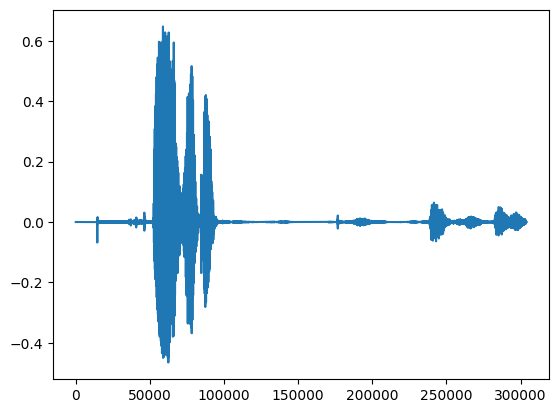

In [68]:
plt.plot(clip)

In [69]:
def cut_wav(wav, sample_rate):
    time_probes = wav.shape[0]
    # clip_dur_in_sec = time_probes / sample_rate
    overlap = int((time_probes - (MIN_CLIP_DURATION/1000) * sample_rate)/2) 
    cut_clip = wav[overlap:(time_probes - overlap)]
    return tf.convert_to_tensor(cut_clip, dtype=tf.float32)

In [70]:
cut_clip = cut_wav(clip, sample_rate)
cut_clip

<tf.Tensor: shape=(192000,), dtype=float32, numpy=
array([-0.13919067, -0.14474487, -0.14996338, ..., -0.00769043,
       -0.00732422, -0.00640869], dtype=float32)>

In [71]:
def add_zeros(wav, sample_rate):
    time_probes = wav.shape[0]
    missing_probes_one_side = int((MIN_CLIP_DURATION/1000* sample_rate - time_probes)//2)
    padded_tensor = tf.pad(wav.numpy(), [[missing_probes_one_side, missing_probes_one_side]])
    return tf.convert_to_tensor(padded_tensor, dtype=tf.float32)


In [72]:
add_zeros(wav[:30000], sample_rate)

<tf.Tensor: shape=(192000,), dtype=float32, numpy=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)>

In [73]:
def align_probes(wav, sample_rate):
    # wav = load_wav_16k_mono_and_resample(file_path)
    expected_probes = int((MIN_CLIP_DURATION/1000) * sample_rate)
    print(expected_probes)
    current_probes = wav.shape[0]
    print(current_probes)
    if expected_probes > current_probes:
        print("Add zeros")
        wav = add_zeros(wav, sample_rate)
    elif expected_probes < current_probes:
        print("Cut wav")
        wav = cut_wav(wav, sample_rate)
    return wav
    

In [74]:
# def align_probes(file_path):
#     wav = load_wav_16k_mono_and_resample(file_path)
#     expected_probes = (MIN_CLIP_DURATION/1000) * sample_rate
#     print(expected_probes)
#     current_probes = wav.shape[0]
#     print(current_probes)
#     if expected_probes > current_probes:
#         print("Add zeros")
#         return add_zeros(wav, sample_rate)
#     if expected_probes < current_probes:
#         print("Cut wav")
#         return cut_wav(wav, sample_rate)
    
    

In [75]:
a = align_probes(cut_clip, sample_rate)
a

192000
192000


<tf.Tensor: shape=(192000,), dtype=float32, numpy=
array([-0.13919067, -0.14474487, -0.14996338, ..., -0.00769043,
       -0.00732422, -0.00640869], dtype=float32)>

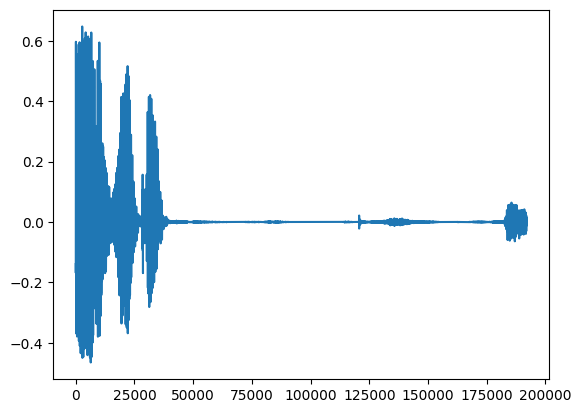

In [76]:
plt.plot(a)

In [77]:
MIN_CLIP_DURATION/1000* sample_rate

192000.0

In [78]:
def increase_amplitude(wav, min_increase=2.0, max_increase=5.0):
    increased_wav = wav * random.uniform(min_increase, max_increase)
    return tf.convert_to_tensor(increased_wav, dtype=tf.float32)

In [79]:
inc_a = increase_amplitude(a)

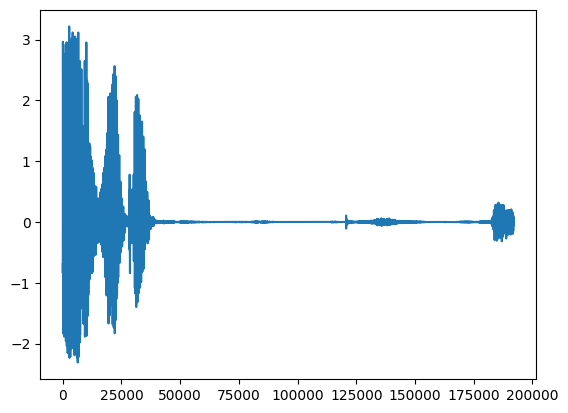

In [80]:
plt.plot(inc_a)

In [81]:
def normalize_audio(wav):
    max_amplitude = tf.reduce_max(tf.abs(wav))
    normalized_wav = wav / max_amplitude  # Normalizacja do zakresu [-1, 1]
    return normalized_wav

In [82]:
norm_a = normalize_audio(inc_a)
norm_a

<tf.Tensor: shape=(192000,), dtype=float32, numpy=
array([-0.21509078, -0.22367366, -0.23173779, ..., -0.01188399,
       -0.01131808, -0.00990332], dtype=float32)>

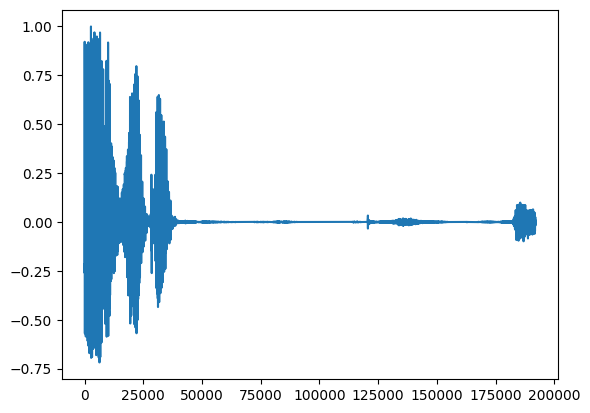

In [83]:
plt.plot(norm_a)

In [84]:
def add_noise(wav, noise_level=0.1):
    noise = tf.random.normal(tf.shape(wav), mean=0.0, stddev=noise_level)
    return wav + noise

In [85]:
noise_a = add_noise(inc_a)
noise_a

<tf.Tensor: shape=(192000,), dtype=float32, numpy=
array([-0.6022218 , -0.7156297 , -0.900321  , ...,  0.11914019,
       -0.11830404,  0.02751157], dtype=float32)>

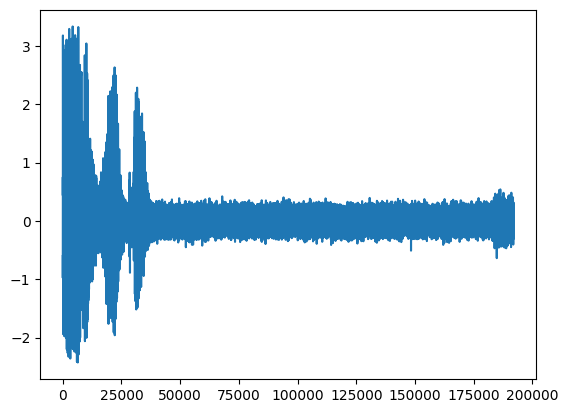

In [86]:
plt.plot(noise_a)

In [87]:
def time_masking(wav, max_mask_length=10000):
    # Sprawdzenie długości wav
        # Sprawdzenie czy wav jest pusty lub ma nieprawidłowy kształt
    if wav is None or tf.rank(wav) != 1:
        return wav
    
    # Sprawdzenie długości wav
    if tf.shape(wav)[0] <= max_mask_length:
        return wav
    
    # Losowa długość maskowania
    mask_length = tf.random.uniform([], maxval=max_mask_length, dtype=tf.int32)
    
    # Sprawdzenie, czy maska nie wyjdzie poza zakres
    mask_start_max = tf.shape(wav)[0] - mask_length
    mask_start = tf.random.uniform([], maxval=mask_start_max, dtype=tf.int32)
    
    # Stworzenie maski czasowej
    mask = tf.concat([
        tf.ones([mask_start]),
        tf.zeros([mask_length]),
        tf.ones([tf.shape(wav)[0] - mask_start - mask_length])
    ], axis=0)
    
    # Zastosowanie maskowania do sygnału audio
    masked_wav = wav * mask
    
    return masked_wav


In [88]:
masked_a = time_masking(inc_a, max_mask_length=50000)
masked_a

<tf.Tensor: shape=(192000,), dtype=float32, numpy=
array([-0.69175446, -0.7193579 , -0.745293  , ..., -0.03822015,
       -0.03640015, -0.03185013], dtype=float32)>

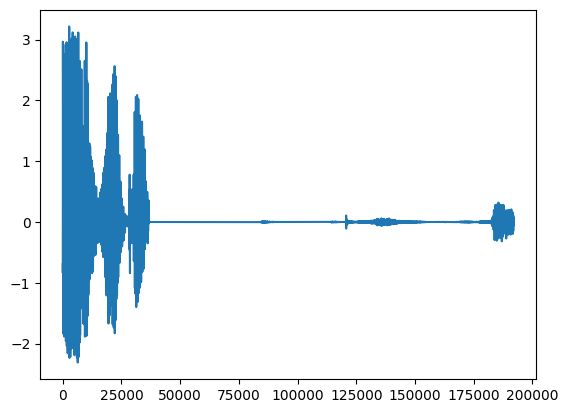

In [89]:
plt.plot(masked_a)

In [90]:
def change_pitch(wav, sample_rate=48000, pitch_shift=2):
    wav_np = wav.numpy()  # Convert tensor to numpy array
    pitched_wav = librosa.effects.pitch_shift(wav_np, sr=sample_rate, n_steps=pitch_shift)
    return tf.convert_to_tensor(pitched_wav, dtype=tf.float32)


In [91]:
pitch_a = change_pitch(inc_a, sample_rate)
pitch_a

<tf.Tensor: shape=(192000,), dtype=float32, numpy=
array([-6.1295027e-01, -7.4053520e-01, -7.2356391e-01, ...,
        6.8496005e-04,  1.7626272e-03,  3.1638960e-03], dtype=float32)>

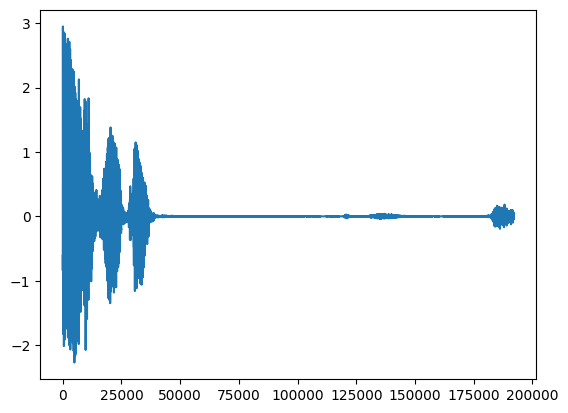

In [92]:
plt.plot(pitch_a)

In [93]:
def speed_up_audio(wav, speed_factor=2):
    # Pobierz tablicę numpy z tensora Tensorflow
    wav_np = wav.numpy()
    
    # Zastosuj przyspieszenie do danych audio
    stretched_wav = librosa.effects.time_stretch(wav_np, rate=speed_factor)
    
    return stretched_wav

In [94]:
speed_a = speed_up_audio(inc_a)
speed_a

array([-0.6381046 , -0.677612  , -0.711368  , ...,  0.02618126,
        0.02420757,  0.02169272], dtype=float32)

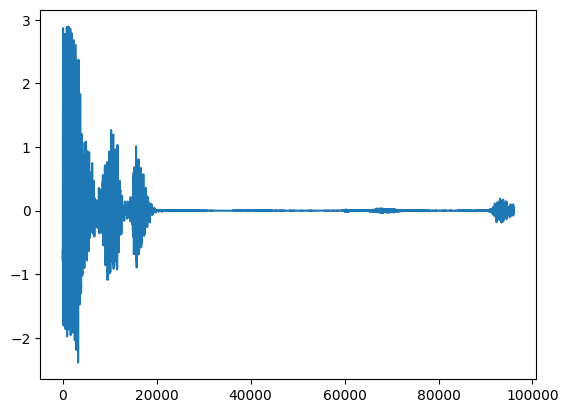

In [95]:
plt.plot(speed_a)

In [96]:
def slow_down_audio(wav, speed_factor=0.5):
    # Konwertujemy tensor na tablicę numpy
    wav_np = wav.numpy()
    
    # Przeprowadzamy zwolnienie tempa za pomocą librosa
    slowed_wav_np = librosa.effects.time_stretch(wav_np, rate=speed_factor)
    
    # Konwertujemy wynikową tablicę numpy z powrotem na tensor TensorFlow
    return tf.convert_to_tensor(slowed_wav_np, dtype=tf.float32)


In [97]:
slow_a = slow_down_audio(wav)

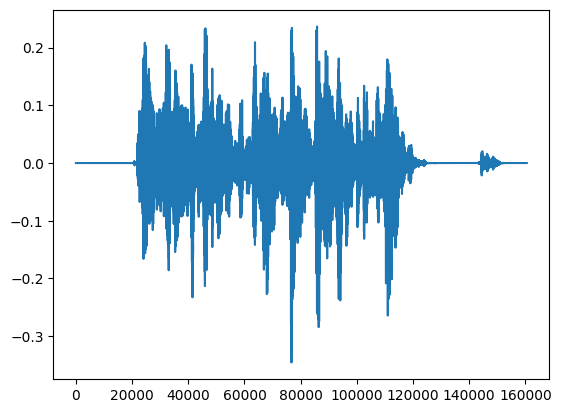

In [98]:
plt.plot(slow_a)

In [99]:

audio_processing_functions = [increase_amplitude, add_noise, time_masking, change_pitch]
def process_random_samples(dataset, num_samples_to_process):
    processed_samples = []
    for _ in range(num_samples_to_process):
        shuffled_dataset = dataset.shuffle(buffer_size=1000)
        random_sample =  next(iter(shuffled_dataset.take(1)))

        # Dobycie tensora z datasetu
  # Tutaj uzyskujemy tensor danych audio

        processing_function = random.choice(audio_processing_functions)
        processed_sample = processing_function(random_sample)

        processed_samples.append(processed_sample)

    return processed_samples

In [100]:
# Wczytaj, przetwórz i zapisz przetworzone pliki audio z pl_dataset_train
pl_dataset_train_processed = pl_dataset_train.map(lambda filename: load_wav_16k_mono_and_resample(filename))
pl_dataset_val_processed = pl_dataset_val.map(lambda filename:load_wav_16k_mono_and_resample(filename))
pl_dataset_test_processed = pl_dataset_test.map(lambda filename: load_wav_16k_mono_and_resample(filename))
# 
# pl_dataset_train_processed.as_numpy_iterator().next().shape[0]

In [101]:
processed_samples_train = process_random_samples(pl_dataset_train_processed, TRAIN_SIZE - len(pl_dataset_train))
processed_samples_val = process_random_samples(pl_dataset_val_processed, (VAL_SIZE - len(pl_dataset_val)))
processed_samples_test = process_random_samples(pl_dataset_test_processed, (TEST_SIZE - len(pl_dataset_test)))
# processed_samples_test

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 289: invalid start byte

In [ ]:
align_processed_train = [align_probes(tensor, sample_rate) for tensor in processed_samples_train]
align_processed_val = [align_probes(tensor, sample_rate) for tensor in processed_samples_val]
align_processed_test = [align_probes(tensor, sample_rate) for tensor in processed_samples_test]


In [ ]:
processed_samples_train_dataset = tf.data.Dataset.from_tensor_slices(align_processed_train)
processed_samples_val_dataset = tf.data.Dataset.from_tensor_slices(align_processed_val)
processed_samples_test_dataset = tf.data.Dataset.from_tensor_slices(align_processed_test)

In [ ]:
processed_samples_test_dataset.as_numpy_iterator()

In [ ]:
align_pl_dataset_train_with_processed_samples = pl_dataset_train_processed.map(lambda audio: align_probes(audio, sample_rate))
align_pl_dataset_val_with_processed_samples = pl_dataset_val_processed.map(lambda audio: align_probes(audio, sample_rate))
align_pl_dataset_test_with_processed_samples = pl_dataset_test_processed.map(lambda audio: align_probes(audio, sample_rate))



In [ ]:
align_pl_dataset_train_with_processed_samples_norm = align_pl_dataset_train_with_processed_samples.map(lambda audio: normalize_audio(audio))
align_pl_dataset_val_with_processed_samples_norm = align_pl_dataset_val_with_processed_samples.map(lambda audio: normalize_audio(audio))
align_pl_dataset_test_with_processed_samples_norm = align_pl_dataset_test_with_processed_samples.map(lambda audio: normalize_audio(audio))

In [ ]:
def create_spectrogram(wav):
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

In [ ]:
spectrogram = create_spectrogram(wav_example)


spectrogram = tf.squeeze(spectrogram, axis=-1)
# spectrogram_in_db = 20 * tf.math.log(spectrogram + 1e-10) / tf.math.log(10.0)
plt.figure(figsize=(10, 4))
plt.imshow(tf.transpose(spectrogram), aspect='auto', origin='lower', cmap='viridis', extent=[0, 10, 0, sample_rate / 2])
plt.colorbar(label='Magnitude')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title('Spectrogram')
plt.show()

In [ ]:
spectrogram = create_spectrogram(pitch_a)
print(spectrogram.shape)

spectrogram = tf.squeeze(spectrogram, axis=-1)
print(spectrogram.shape)
plt.figure(figsize=(10, 4))
plt.imshow(tf.transpose(spectrogram), aspect='auto', origin='lower', cmap='viridis', extent=[0, 10, 0, sample_rate / 2])
plt.colorbar(label='Magnitude')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title('Spectrogram')
plt.show()

In [ ]:
spectrogram_pl_dataset_train = align_pl_dataset_train_with_processed_samples_norm.map(lambda audio: create_spectrogram(audio))
spectrogram_pl_dataset_val = align_pl_dataset_val_with_processed_samples_norm.map(lambda audio: create_spectrogram(audio))
spectrogram_pl_dataset_test = align_pl_dataset_test_with_processed_samples_norm.map(lambda audio: create_spectrogram(audio))